In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/online_shoppers_intention.csv')
df.head(8)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False


In [3]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [4]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


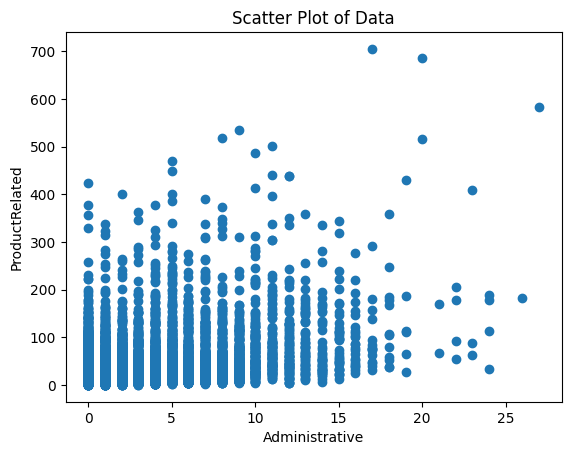

In [6]:
plt.scatter(x=df['Administrative'], y=df['ProductRelated'])
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.title('Scatter Plot of Data')
plt.show()

In [7]:
columns_for_clustering = ['Administrative', 'ProductRelated']

ELBOW METHOD

In [8]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=2)
    kmeans.fit(df[columns_for_clustering])
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

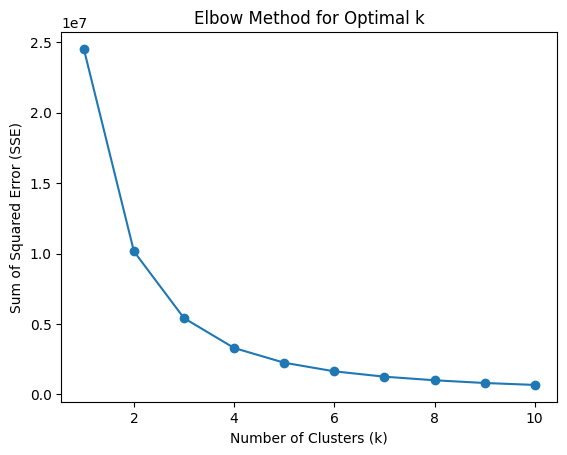

In [9]:
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

In [11]:
optimal_k = int(input("Enter the optimal number of clusters: "))

Enter the optimal number of clusters: 4


K-MEANS

In [12]:
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=2)
kmeans_optimal.fit(df[columns_for_clustering])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=2)

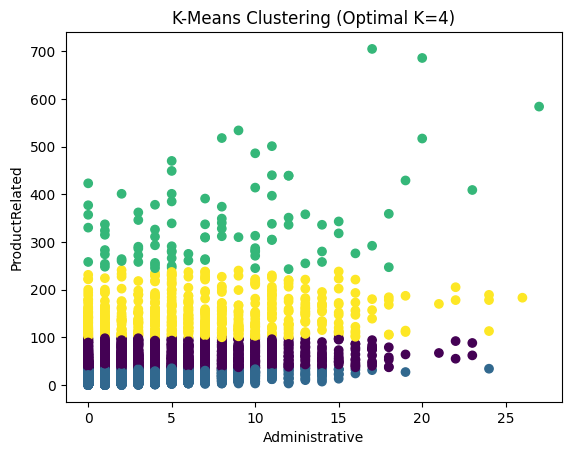

In [13]:
df['KMeans_Optimal'] = kmeans_optimal.labels_

plt.scatter(x=df['Administrative'], y=df['ProductRelated'], c=df['KMeans_Optimal'], cmap='viridis')
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.title(f'K-Means Clustering (Optimal K={optimal_k})')
plt.show()

Silhouette score

The silhouette score is a metric used to measure the goodness of a clustering technique. Clustering is a type of unsupervised learning where the goal is to group similar data points together. The silhouette score quantifies how well-separated the clusters are. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

The silhouette score for an individual data point is given by the formula:

\[ s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}} \]

where:
- \( s(i) \) is the silhouette score for data point \(i\),
- \( a(i) \) is the average distance from the \(i\)-th data point to the other data points in the same cluster,
- \( b(i) \) is the smallest average distance from the \(i\)-th data point to data points in a different cluster (minimized over clusters).

The silhouette score for the entire clustering is the average of the silhouette score for each instance. A higher average silhouette score indicates a better-defined clustering.

In summary, a silhouette score close to 1 indicates a good clustering, while a score close to -1 suggests that data points may have been assigned to the wrong cluster. A score around 0 indicates overlapping clusters.

Keep in mind that while the silhouette score is a useful metric, it may not always be appropriate for all types of data or clustering algorithms, and it's often recommended to use it in conjunction with other evaluation methods.

In [14]:
silhouette_avg_kmeans = silhouette_score(df[columns_for_clustering], kmeans_optimal.labels_)
print(f'Silhouette Score for K-Means Clustering: {silhouette_avg_kmeans}')

Silhouette Score for K-Means Clustering: 0.6414906576886822


The Silhouette Score is a measure of how well-separated clusters are in a clustering algorithm, such as K-Means. It ranges from -1 to 1, where a higher score indicates better-defined clusters.

In your case, a Silhouette Score of 0.6414906576886822 for K-Means clustering suggests that the clusters are reasonably well-separated and have a distinct boundary. A score around 0.64 is generally considered good, indicating a meaningful and appropriate clustering of the data. However, the interpretation should also consider the specific characteristics of your data and the context of your analysis.

In summary, a Silhouette Score of 0.6414906576886822 in K-Means clustering indicates a relatively good clustering quality with well-defined and separated clusters.

Hierarchical Clustering

In [15]:
data_scaled_hierarchical = StandardScaler().fit_transform(df[columns_for_clustering])
linkage_matrix = linkage(data_scaled_hierarchical, method='ward')


dendrogram plotting

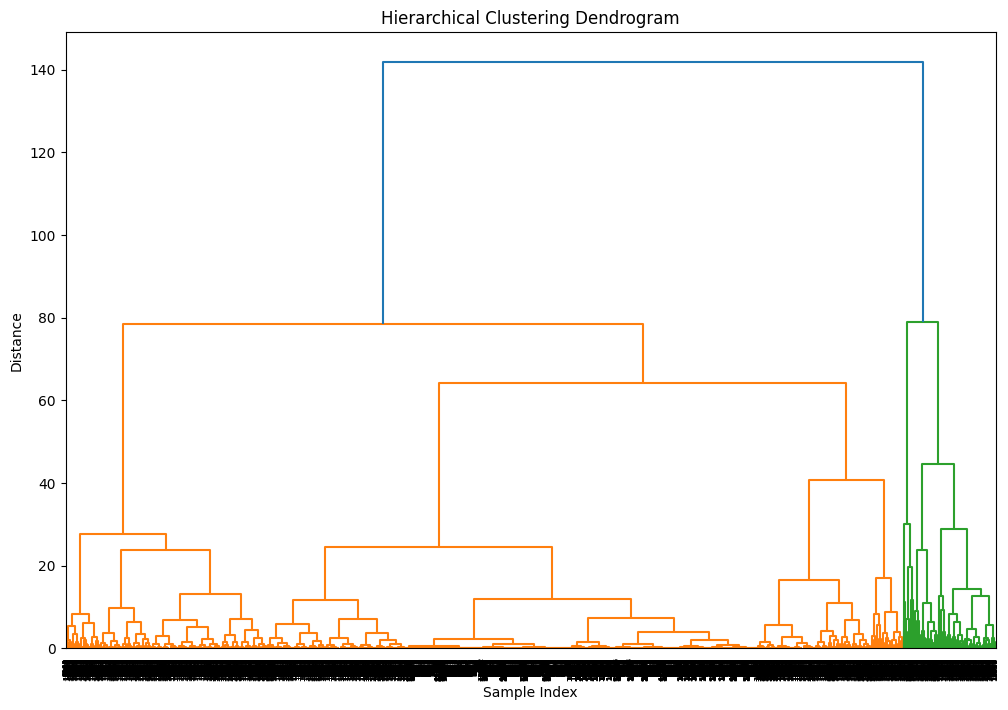

In [16]:
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [21]:
optimal_clusters_hierarchical = int(input("Enter the optimal number of clusters for Hierarchical clustering: "))

Enter the optimal number of clusters for Hierarchical clustering: 3


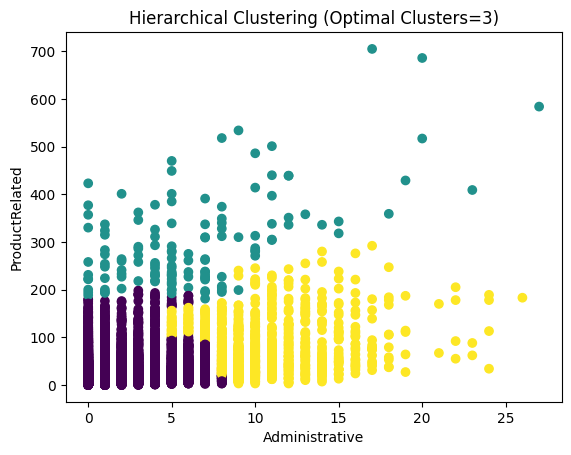

In [22]:
hierarchical_clusters = fcluster(linkage_matrix, optimal_clusters_hierarchical, criterion='maxclust')
df['Hierarchical_Clusters'] = hierarchical_clusters

plt.scatter(x=df['Administrative'], y=df['ProductRelated'], c=df['Hierarchical_Clusters'], cmap='viridis')
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.title(f'Hierarchical Clustering (Optimal Clusters={optimal_clusters_hierarchical})')
plt.show()

Silhouette score
The pairwise_distances function computes the distances between individual data points in your dataset. Subsequently, the silhouette score is determined by utilizing the cluster assignments obtained through hierarchical clustering.

In [23]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster

pairwise_distances = pdist(StandardScaler().fit_transform(df[columns_for_clustering]))
pairwise_distances_square = squareform(pairwise_distances)

if np.isnan(pairwise_distances_square).any():
    raise ValueError("Pairwise distances contain missing values. Handle or remove missing values before proceeding.")

if len(hierarchical_clusters) != len(pairwise_distances_square):
    raise ValueError("Inconsistent numbers of samples between hierarchical_clusters and pairwise_distances_square.")

silhouette_avg_hierarchical = silhouette_score(pairwise_distances_square, hierarchical_clusters)

print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical}')

Silhouette Score for Hierarchical Clustering: 0.6537565997024019
